In [7]:
%reload_ext autoreload

%autoreload 2

In [2]:
input_file = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_fragion_isotopes.aq_reformat.tsv"
directlfq_file = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_fragion_isotopes.aq_reformat.tsv.protein_intensities.tsv"

spectronaut_protein_intensities = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_protein.aq_reformat.tsv"
maxDIA_protein_intensities = "../../test_data/system_tests/Spectronaut_SmallFC/maxdia_reprocessing/proteinGroups.txt"
iq_protein_intensities = "../../test_data/system_tests/Spectronaut_SmallFC/iq_reprocessing/spectronaut_smallfc_set_iq-MaxLFQ-fast.txt"


protein_mapping_file = "../../test_data/system_tests/Spectronaut_SmallFC/protein_species_map.tsv"
samplemap = "../../test_data/system_tests/Spectronaut_SmallFC/samples.map.tsv"
samplemap_maxdia = "../../test_data/system_tests/Spectronaut_SmallFC/maxdia_reprocessing/samplemap.tsv"

run_directlfq = False

In [79]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file)


In [18]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils

samplemap_df = lfqutils.load_samplemap(samplemap)
samples_used = lfqutils.get_samples_used_from_samplemap_df(samplemap_df, cond1="S1", cond2="S2")
samples_used_maxdia = lfqutils.get_samples_used_from_samplemap_file(samplemap_maxdia, cond1="S1", cond2="S2")

restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_iq = lfqbenchmark.ResultsTableDirectLFQ(input_file=iq_protein_intensities, input_name="iq", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_spectronaut = lfqbenchmark.ResultsTableDirectLFQ(input_file=spectronaut_protein_intensities, input_name="Spectronaut", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_maxdia = lfqbenchmark.ResultsTableMaxQuant(input_file=maxDIA_protein_intensities, input_name="maxDIA", samples_c1=samples_used_maxdia[0], samples_c2=samples_used_maxdia[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:151: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:151: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:151: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]


In [19]:
display(restable_iq.formated_dataframe)
display(restable_directlfq.formated_dataframe)

,protein,PG.Organisms,MaxLFQ_annotation,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R01_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R02_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R03_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R01_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R02_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R03_T0.htrms,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,Caenorhabditis elegans,NaN,12.127803,11.882431,11.733627,12.021682,11.879373,12.039310,11.882431,12.021682,-0.016809,11.952056
1,A0A061ACL3;O76618;Q965I6,Caenorhabditis elegans,NaN,13.351426,13.242046,13.116774,13.445374,13.361346,13.224162,13.242046,13.361346,-0.012939,13.301696
2,A0A061ACR1;F5GUA3;Q22498;Q2XN02,Caenorhabditis elegans,NaN,13.229293,13.162792,13.105977,13.364202,13.329408,13.369481,13.162792,13.364202,-0.021908,13.263497
3,A0A061ACS9;G5EBE2;G5EBY2;G5EE94;K8ESB8;K8ESI6;...,Caenorhabditis elegans,NaN,13.938539,10.768114,10.963477,12.147541,11.194874,11.896805,10.963477,11.896805,-0.117869,11.430141
4,A0A061ACU2;A0A061AE33;A0A061AJB7;A0A061AL01;A0...,Caenorhabditis elegans,NaN,12.074812,11.770226,9.735762,12.134015,11.259072,11.381226,11.770226,11.381226,0.048486,11.575726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358,V6CIS4;V6CJX7;V6CL74;V6CLA2,Caenorhabditis elegans,NaN,12.855932,12.735977,12.699250,12.900718,12.850991,12.834572,12.735977,12.850991,-0.012970,12.793484
11359,V6CJ04;V6CK55,Caenorhabditis elegans,NaN,12.797411,12.844344,12.750720,12.968550,12.898574,12.871459,12.797411,12.898574,-0.011360,12.847993
11360,W6RQY9;W6RY35,Caenorhabditis elegans,NaN,11.401853,11.072112,11.164880,11.487700,11.225318,11.529686,11.164880,11.487700,-0.041122,11.326290
11361,W6RTA4;W6SB91,Caenorhabditis elegans,NaN,14.735985,14.401953,14.200512,14.958911,14.617228,14.403746,14.401953,14.617228,-0.021405,14.509591


,protein,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R01_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R02_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R03_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R01_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R02_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R03_T0.htrms,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,2.314132e+06,2.050728e+06,1.963689e+06,2.121836e+06,1.856930e+06,2.177657e+06,2.050728e+06,2.121836e+06,-0.049177,2.086282e+06
1,A0A061ACL3;O76618;Q965I6,5.183858e+07,4.837068e+07,5.027366e+07,5.508368e+07,5.556652e+07,4.699896e+07,5.027366e+07,5.508368e+07,-0.131822,5.267867e+07
2,A0A061ACR1;F5GUA3;Q22498;Q2XN02,4.293568e+07,3.879940e+07,3.601455e+07,4.273725e+07,4.478126e+07,4.904556e+07,3.879940e+07,4.478126e+07,-0.206861,4.179033e+07
3,A0A061ACS9;G5EBE2;G5EBY2;G5EE94;K8ESB8;K8ESI6;...,6.057391e+06,4.234062e+06,7.118574e+06,5.979778e+06,5.536224e+06,7.900185e+06,6.057391e+06,5.979778e+06,0.018605,6.018585e+06
4,A0A061ACU2;A0A061AE33;A0A061AJB7;A0A061AL01;A0...,2.675629e+06,2.601552e+06,8.073897e+05,2.897971e+06,1.977831e+06,1.749176e+06,2.601552e+06,1.977831e+06,0.395453,2.289692e+06
...,...,...,...,...,...,...,...,...,...,...,...
11358,V6CIS4;V6CJX7;V6CL74;V6CLA2,2.435130e+07,2.476200e+07,2.329299e+07,2.519961e+07,2.553847e+07,2.614003e+07,2.435130e+07,2.553847e+07,-0.068673,2.494489e+07
11359,V6CJ04;V6CK55,2.520752e+07,2.656524e+07,2.378929e+07,2.869459e+07,2.765873e+07,2.564910e+07,2.520752e+07,2.765873e+07,-0.133881,2.643313e+07
11360,W6RQY9;W6RY35,2.171470e+07,1.979510e+07,2.189613e+07,2.379333e+07,2.133066e+07,2.390724e+07,2.171470e+07,2.379333e+07,-0.131885,2.275401e+07
11361,W6RTA4;W6SB91,5.708908e+07,5.415506e+07,4.839906e+07,5.986050e+07,6.030939e+07,5.800412e+07,5.415506e+07,5.986050e+07,-0.144508,5.700778e+07


In [20]:
organism_annotator_spectronaut_based = lfqbenchmark.OrganismAnnotatorSpectronaut(mapping_file=protein_mapping_file,protein_column="PG.ProteinGroups", organism_column="PG.Organisms")
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_directlfq)
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_spectronaut)
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_iq)

organism_annotator_maxDIA_based = lfqbenchmark.OrganismAnnotatorMaxQuant(mapping_file=maxDIA_protein_intensities)
organism_annotator_maxDIA_based.annotate_table_with_organism(restable_maxdia)

/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-2.0, 2.0)

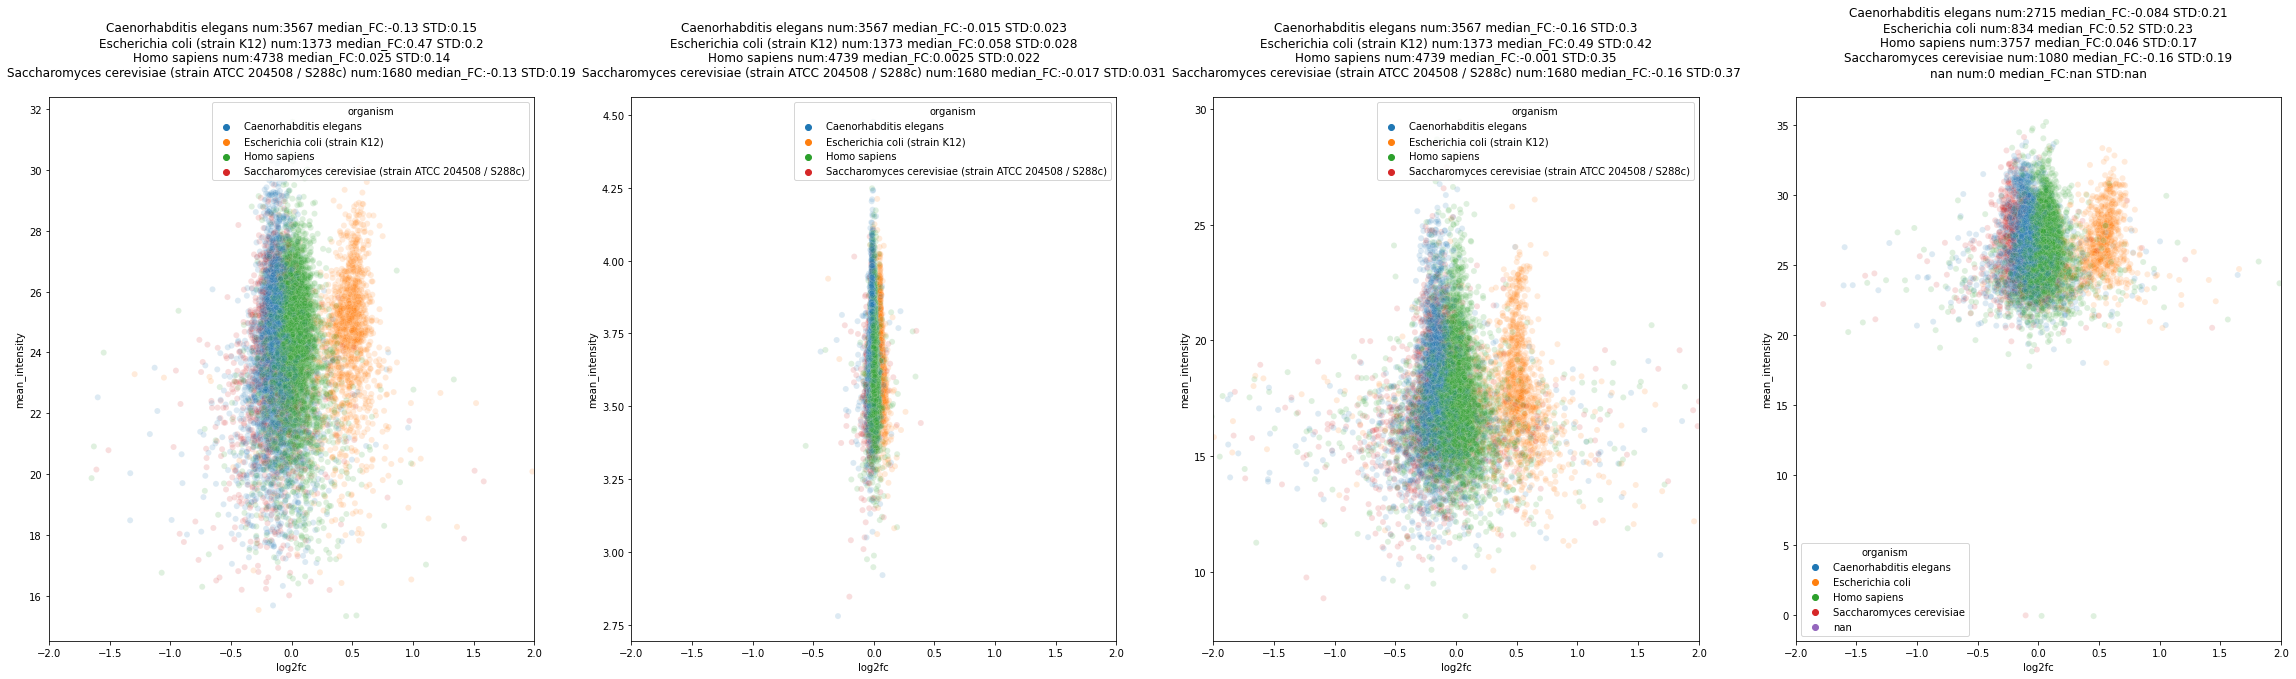

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4,figsize=(40,10))


fcplotter_directLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[0], resultstable_w_ratios=restable_directlfq)

fcplotter_iq = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_iq)
fcplotter_spectronaut = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios= restable_spectronaut)
fcplotter_maxDIA = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[3], resultstable_w_ratios=restable_maxdia)

axes[0].set_xlim([-2, 2])
# axes[0].set_ylim([15, 33])
axes[1].set_xlim([-2, 2])
# axes[1].set_ylim([17, 35])
axes[2].set_xlim([-2, 2])
axes[3].set_xlim([-2, 2])

In [17]:
import pandas as pd

df = pd.read_csv(iq_protein_intensities, sep = "\t")
df = df.rename(columns={"Unnamed: 1" : "PG.Organisms", "PG.ProteinGroups" : 'protein'})
display(df)
df.to_csv(iq_protein_intensities, sep = "\t", index = None)

,protein,PG.Organisms,MaxLFQ_annotation,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R01_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R02_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S1_MHRM_R03_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R01_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R02_T0.htrms,Fig3_MP-DIA-multi-organism-Run-S2_MHRM_R03_T0.htrms
0,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,Caenorhabditis elegans,NaN,12.127803,11.882431,11.733627,12.021682,11.879373,12.039310
1,A0A061ACL3;O76618;Q965I6,Caenorhabditis elegans,NaN,13.351426,13.242046,13.116774,13.445374,13.361346,13.224162
2,A0A061ACR1;F5GUA3;Q22498;Q2XN02,Caenorhabditis elegans,NaN,13.229293,13.162792,13.105977,13.364202,13.329408,13.369481
3,A0A061ACS9;G5EBE2;G5EBY2;G5EE94;K8ESB8;K8ESI6;...,Caenorhabditis elegans,NaN,13.938539,10.768114,10.963477,12.147541,11.194874,11.896805
4,A0A061ACU2;A0A061AE33;A0A061AJB7;A0A061AL01;A0...,Caenorhabditis elegans,NaN,12.074812,11.770226,9.735762,12.134015,11.259072,11.381226
...,...,...,...,...,...,...,...,...,...
11358,V6CIS4;V6CJX7;V6CL74;V6CLA2,Caenorhabditis elegans,NaN,12.855932,12.735977,12.699250,12.900718,12.850991,12.834572
11359,V6CJ04;V6CK55,Caenorhabditis elegans,NaN,12.797411,12.844344,12.750720,12.968550,12.898574,12.871459
11360,W6RQY9;W6RY35,Caenorhabditis elegans,NaN,11.401853,11.072112,11.164880,11.487700,11.225318,11.529686
11361,W6RTA4;W6SB91,Caenorhabditis elegans,NaN,14.735985,14.401953,14.200512,14.958911,14.617228,14.403746
